<a href="https://colab.research.google.com/github/thanhchi514/AI/blob/main/fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""folder = '/content/drive/MyDrive/data_fish_text'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('cachep'):
    output = 0
  elif file.startswith('calaukieng'):
    output = 1
  elif file.startswith('carophi'):
    output = 2
  elif file.startswith('cathaclac'):
    output = 3
  elif file.startswith('catre'):
    output = 4
  else:
    continue
  photo = load_img(folder + '/' + file, target_size=(30, 40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
save('Photos.npy', photos)
save('Labels.npy', labels)"""

In [ ]:
"""!cp Photos.npy "/content/drive/My Drive/Colab Notebooks"
!cp Labels.npy "/content/drive/My Drive/Colab Notebooks"""

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
photos = np.load('/content/drive/My Drive/Colab Notebooks/Photos.npy')
labels = np.load('/content/drive/My Drive/Colab Notebooks/Labels.npy')

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3)

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (2746, 30, 40, 3)
x_test shape:  (1177, 30, 40, 3)
y_train shape:  (2746,)
y_test shape:  (1177,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 30, 40, 3)
x_test = x_test.reshape(x_test.shape[0], 30, 40, 3)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LeakyReLU, Dropout
model = Sequential()
#training data to recognize different faces, remember to use LeakyReLU, Dropout, Normalization
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(30, 40, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(5, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 38, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 38, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 19, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 19, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 17, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 12, 17, 64)        0         
                                                        

In [ ]:
#compile stop when the accuracy stop increasing
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 32, epochs=100, callbacks=[early_stopping])

Epoch 1/100
86/86 [==============================] - 12s 14ms/step - loss: 1.3311 - accuracy: 0.5222 - val_loss: 1.2915 - val_accuracy: 0.5667
Epoch 2/100
86/86 [==============================] - 1s 7ms/step - loss: 1.1749 - accuracy: 0.5761 - val_loss: 1.0250 - val_accuracy: 0.6330
Epoch 3/100
86/86 [==============================] - 1s 6ms/step - loss: 1.0245 - accuracy: 0.6264 - val_loss: 0.8664 - val_accuracy: 0.6771
Epoch 4/100
86/86 [==============================] - 1s 6ms/step - loss: 0.9173 - accuracy: 0.6577 - val_loss: 0.8208 - val_accuracy: 0.6975
Epoch 5/100
86/86 [==============================] - 1s 6ms/step - loss: 0.8484 - accuracy: 0.6850 - val_loss: 0.7751 - val_accuracy: 0.7145
Epoch 6/100
86/86 [==============================] - 1s 6ms/step - loss: 0.7880 - accuracy: 0.7036 - val_loss: 0.7112 - val_accuracy: 0.7409
Epoch 7/100
86/86 [==============================] - 0s 6ms/step - loss: 0.7324 - accuracy: 0.7305 - val_loss: 0.6636 - val_accuracy: 0.7468
Epoch 8/100

In [ ]:
#evaluate score
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3408369719982147
Test accuracy: 0.8878504633903503


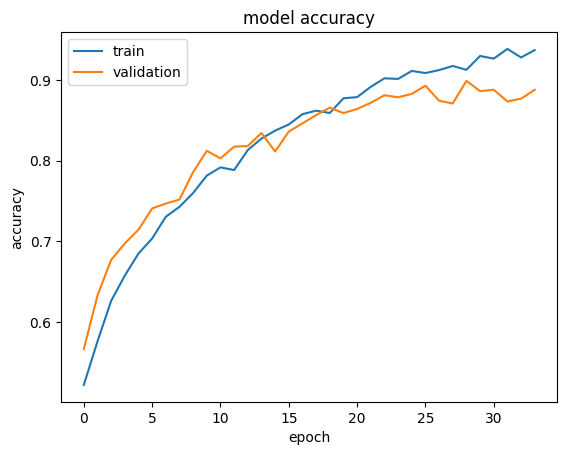

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
!cp model.h5 '/content/drive/MyDrive/Colab Notebooks/'